In [91]:
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation
from IPython.display import HTML
from IPython import display
import numpy as np
from PIL import Image

class Perlin(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def fade(self, t):
        return 6 * t ** 5 - 15 * t ** 4 + 10 * t ** 3

    def lerp(self, a, b, x):
        return a + x * (b - a)

    def gradient(self, h, x, y):
        vectors = np.array([[0, 1], [0, -1], [1, 0], [-1, 0]])
        g = vectors[h % 4]
        return g[:, :, 0] * x + g[:, :, 1] * y + 1

    def perlin(self, seed, x, y):
        np.random.seed(seed)
        p = np.arange(256, dtype=int)
        np.random.shuffle(p)
        p = np.stack([p, p]).flatten()
        xi = x.astype(int)
        yi = y.astype(int)
        xf = x - xi
        yf = y - yi
        u = self.fade(xf)
        v = self.fade(yf)
        n00 = self.gradient(p[p[xi] + yi], xf, yf)
        n01 = self.gradient(p[p[xi] + yi + 1], xf, yf - 1)
        n11 = self.gradient(p[p[xi + 1] + yi + 1], xf - 1, yf - 1)
        n10 = self.gradient(p[p[xi + 1] + yi], xf - 1, yf)
        x1 = self.lerp(n00, n10, u)
        x2 = self.lerp(n01, n11, u)
        return self.lerp(x1, x2, v)
    
def iterate_perlin(t,x,y):
    return Perlin(xv, yv).perlin(t, x,y)

def animation():
    fig, ax = plt.subplots()
    animation = FuncAnimation(fig, func=iterate_perlin, frames=5, interval=20)
    video = animation.to_html5_video()
    # embedding for the video
    html = display.HTML(video)
    # draw the animation
    display.display(html)


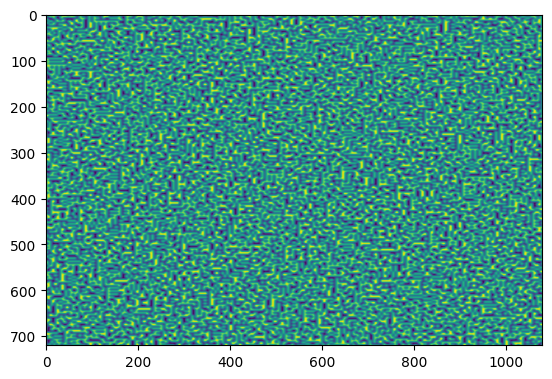

In [98]:
view_scale = size / 12

x = np.linspace(5, 111, 1080)
y = np.linspace(5, 111, 720)
xv, yv = np.meshgrid(x, y)
#
#Animation
#
# fig, ax = plt.subplots()
# 
# ims = []
# for i in range(20):
#     im = ax.imshow(iterate_perlin(3,xv+i,yv+i), animated=True)
#     ims.append([im])
#     
# ani = ArtistAnimation(fig, ims, interval=100,repeat_delay=10000)
# ani.save("perlin.mp4")

plt.imsave("perlin.png", iterate_perlin(1,xv,yv), cmap='gray', dpi=1000)
plt.show()